In [1]:
#Inicialização
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt
import math as m
import navFunc as nf
from navFunc.cls import cls
from IPython.display import Image

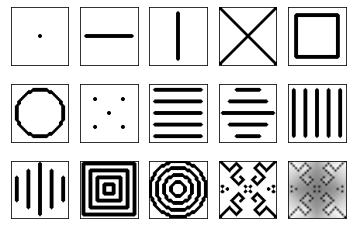

In [2]:
#Imagens básicas como entrada
img00 = cv.imread("../gcPDI/imgSimple/00sDot.png",0)
img01 = cv.imread("../gcPDI/imgSimple/01sHorizontal.png",0)
img02 = cv.imread("../gcPDI/imgSimple/02sVertical.png",0)
img03 = cv.imread("../gcPDI/imgSimple/03sX.png",0)
img04 = cv.imread("../gcPDI/imgSimple/04sSquare.png",0)
img05 = cv.imread("../gcPDI/imgSimple/05sCircle.png",0)
img10 = cv.imread("../gcPDI/imgSimple/10mDots.png",0)
img11 = cv.imread("../gcPDI/imgSimple/11mHorizontals.png",0)
img12 = cv.imread("../gcPDI/imgSimple/12mHorizontals2.png",0)
img13 = cv.imread("../gcPDI/imgSimple/13mVerticals.png",0)
img14 = cv.imread("../gcPDI/imgSimple/14mVerticals2.png",0)
img15 = cv.imread("../gcPDI/imgSimple/15mSquares.png",0)
img16 = cv.imread("../gcPDI/imgSimple/16mCircles.png",0)
img20 = cv.imread("../gcPDI/imgSimple/20random.png",0)
img21 = cv.imread("../gcPDI/imgSimple/21colorRandom.png",0)
simpleImg = [img00, img01, img02, img03, img04, img05, img10, img11, img12, img13, img14, img15, img16, img20, img21]              
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(simpleImg[i],cmap='gray')
    plt.xticks([]),plt.yticks([])
plt.show()

## Mediana
(Median Filter, Median Blur)

### Teoria

O **Filtro Mediana** é um filtro que captura os valores dos pixels da vizinhança, os organizam de forma crescente (ou decrescente), e assim substitui o valor desse pixel pela mediana da ordem dos valores.
<img src="https://docs.gimp.org/2.10/en/images/filters/examples/blur/median-calcul.png">
<p style="font-size: 10px;">Fonte: Documentação GIMP</p>

Assim como o **Filtro Média**, esse filtro normalmente é utilizado para redução de ruído na imagem, mas oferece um melhor resultado ao se tratar de preservar detalhes na imagem. Possui como vantagens:
+ Um pixel bem menos significativo na vizinhança não afetará significativamente o valor da mediana.
+ Como é um valor escolhido, e não calculado, não cria novos valores irrealistas quando o filtro se estende por uma borda. Essa característica que permite preservar melhor as bordas agudas.

### Manipulações com OpenCV

ksize = 3


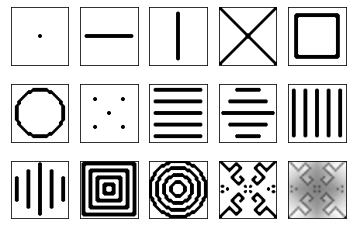

ksize = 5


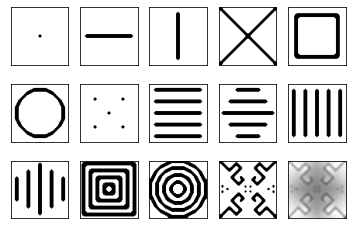

ksize = 7


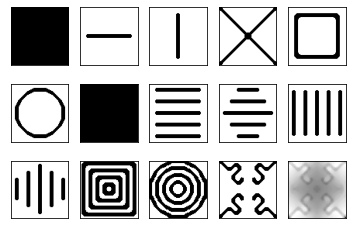

ksize = 9


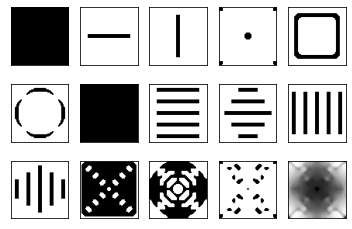

In [3]:
for ksize in range(3,10,2):
    for i in range(15):
        plt.subplot(3,5,i+1)
        dst = cv.medianBlur(simpleImg[i],ksize)
        plt.imshow(dst,cmap='gray')
        plt.xticks([]),plt.yticks([])
    print("ksize = {}".format(ksize))
    plt.show()

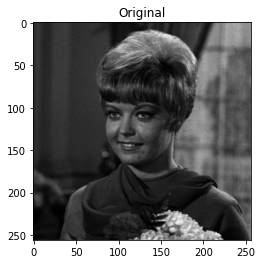

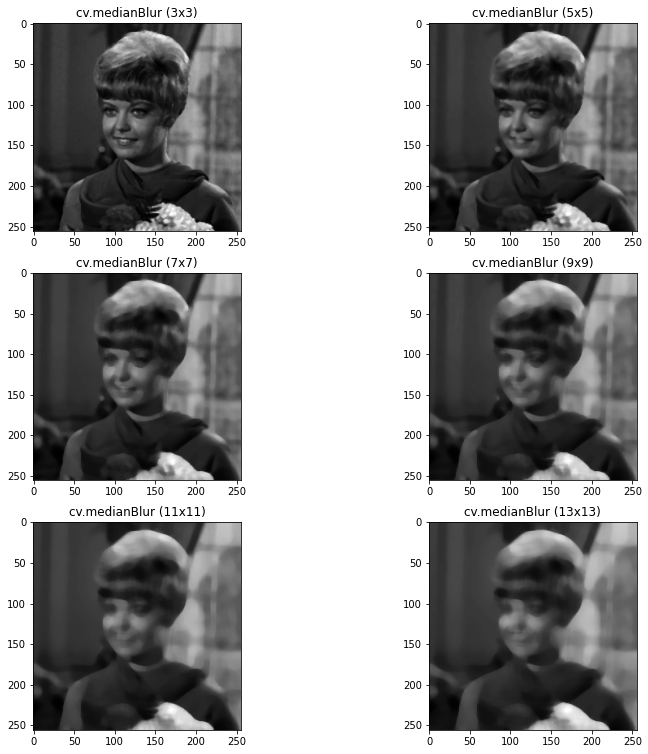

In [4]:
#Loop para 6 kernels

img = cv.imread("../gcPDI/imgPDI/female01.tiff",0)
plt.imshow(img,cmap="gray")
plt.title("Original")
plt.show()
#Modo figura para poder escalar a imagem
f, axarr = plt.subplots(3, 2)
i=0
for kSize in range(3,15,2):    
    dst = cv.medianBlur(img, kSize)  
    f.set_figheight(13)
    f.set_figwidth(13)    
    if kSize < 6 :
        axarr[0, i].imshow(dst,"gray")
        axarr[0, i].set_title("cv.medianBlur ({}x{})".format(kSize,kSize))
    elif kSize < 10 :
        axarr[1, i-2].imshow(dst,"gray")
        axarr[1, i-2].set_title("cv.medianBlur ({}x{})".format(kSize,kSize))
    else :
        axarr[2, i-4].imshow(dst,"gray")
        axarr[2, i-4].set_title("cv.medianBlur ({}x{})".format(kSize,kSize))
    i+=1
plt.show()    

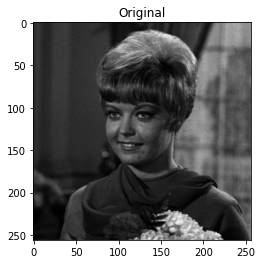

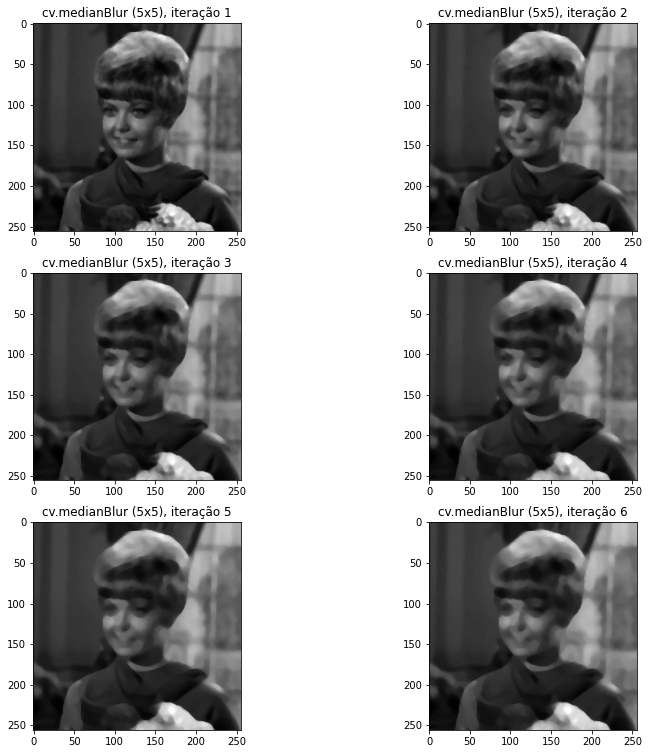

In [5]:
#Loop para 6 Iterações

dst = cv.imread("../gcPDI/imgPDI/female01.tiff",0)
plt.imshow(dst,cmap="gray")
plt.title("Original")
plt.show()
kSize=5
#Modo figura para poder escalar a imagem
f, axarr = plt.subplots(3, 2)

for i in range(6):
    dst = cv.medianBlur(dst, kSize)  
    f.set_figheight(13)
    f.set_figwidth(13)    
    if i < 2 :
        axarr[0, i].imshow(dst,"gray")
        axarr[0, i].set_title("cv.medianBlur ({}x{}), iteração {}".format(kSize,kSize,i+1))
    elif i < 4 :
        axarr[1, i-2].imshow(dst,"gray")
        axarr[1, i-2].set_title("cv.medianBlur ({}x{}), iteração {}".format(kSize,kSize,i+1))
    else :
        axarr[2, i-4].imshow(dst,"gray")
        axarr[2, i-4].set_title("cv.medianBlur ({}x{}), iteração {}".format(kSize,kSize,i+1))
plt.show()

### Desenvolvimento do Filtro

In [6]:
def filterMApply(img, kernelSize, nApl):    
    # Cria variavel do tipo struct (similar ao matlab):
    Filter = nf.structtype()                

    Filter.img = np.array(img)

    Filter.imgSize = nf.structtype()
    Filter.imgSize.lin, Filter.imgSize.col = Filter.img.shape

    #################### Filtro da média
    # Kernel def:

    Filter.kernelSize = kernelSize

    # Número de aplicações do filtro
    numAp = nApl #Número de aplicações, retirado ";"

    # Variável auxiliar para guardar a saída
    U = np.zeros((numAp, Filter.imgSize.lin, Filter.imgSize.col)) #"N" matrizes de lin x col
    for k in range(0, numAp): #de 0 (1 iteração) até (numAp-1) aplicações (ou seja, numAp aplicações)
        if k == 0:
            U[k,:,:] = nf.filterMedian(Filter) #Matriz K, de todo X e todo Y recebem da função de filtro
            #print(U[k, :, :])
        else:
            Filter.img = U[k-1,:,:] #Para iteração, o novo filter.img é a matriz anterior.
            U[k, :, :] = nf.filterMedian(Filter) #Aplica novamente o filtro
            #print(U[k,:,:])
    return U[(numAp - 1),:,:] #Retorna a última matriz, todo seu X e todo seu Y. se numAp = 1, retorna a matriz 0

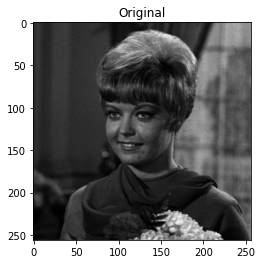

#.#.#.#.#.#.

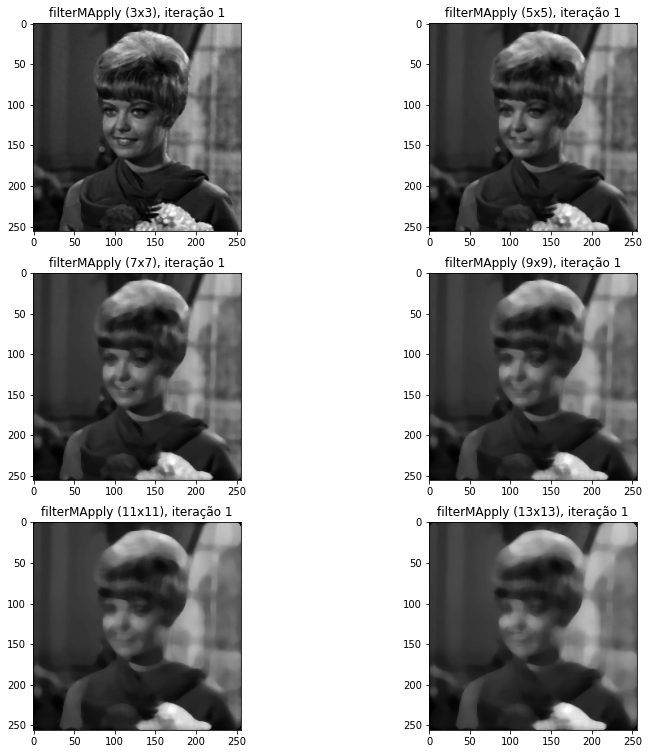

In [7]:
#Loop para 6 Kernels
src = cv.imread("../gcPDI/imgPDI/female01.tiff",0)
plt.imshow(src,cmap="gray")
plt.title("Original")
plt.show()
#Entradas do kernel e de iterações
#ksize = 5
nits = 1
#Modo figura para poder escalar a imagem
f, axarr = plt.subplots(3, 2)
i = 0
for ksize in range(3,15,2):
    dst = filterMApply(src, ksize, nits)
    f.set_figheight(13)
    f.set_figwidth(13)    
    if ksize < 7 :
        axarr[0, i].imshow(dst,"gray")
        axarr[0, i].set_title("filterMApply ({}x{}), iteração {}".format(ksize,ksize,nits))
    elif ksize < 10 :
        axarr[1, i-2].imshow(dst,"gray")
        axarr[1, i-2].set_title("filterMApply ({}x{}), iteração {}".format(ksize,ksize,nits))
    else :
        axarr[2, i-4].imshow(dst,"gray")
        axarr[2, i-4].set_title("filterMApply ({}x{}), iteração {}".format(ksize,ksize,nits))
    i+=1
plt.show()        

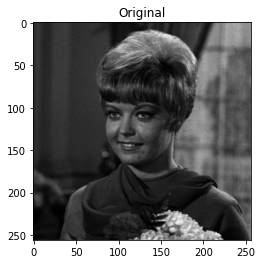

#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.

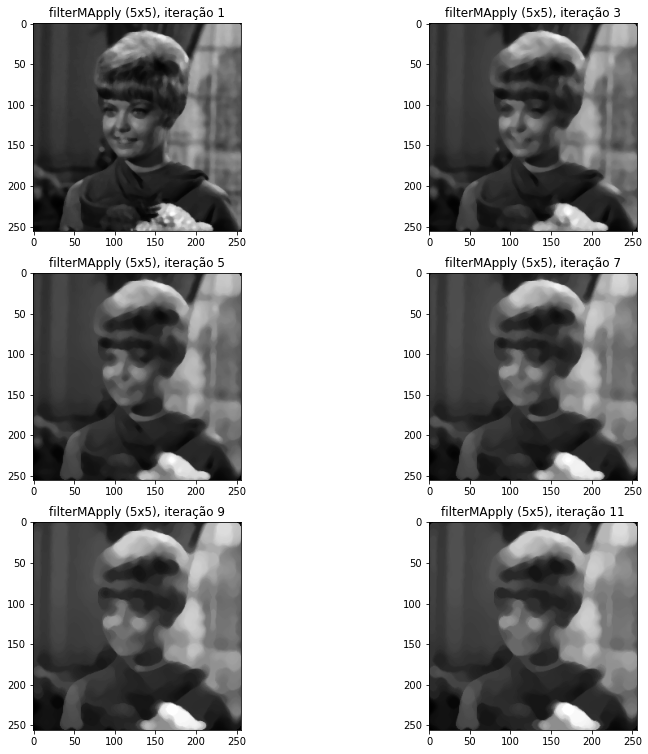

In [7]:
#Loop para 6 Iterações
dst = cv.imread("../gcPDI/imgPDI/female01.tiff",0)
plt.imshow(dst,cmap="gray")
plt.title("Original")
plt.show()
ksize=5
#nit=1
#Modo figura para poder escalar a imagem
f, axarr = plt.subplots(3, 2)

for i in range(6):
    dst = filterMApply(dst, ksize, (i*2)+1)  
    f.set_figheight(13)
    f.set_figwidth(13)    
    if i < 2 :
        axarr[0, i].imshow(dst,"gray")
        axarr[0, i].set_title("filterMApply ({}x{}), iteração {}".format(ksize,ksize,(i*2)+1))
    elif i < 4 :
        axarr[1, i-2].imshow(dst,"gray")
        axarr[1, i-2].set_title("filterMApply ({}x{}), iteração {}".format(ksize,ksize,(i*2)+1))
    else :
        axarr[2, i-4].imshow(dst,"gray")
        axarr[2, i-4].set_title("filterMApply ({}x{}), iteração {}".format(ksize,ksize,(i*2)+1))
plt.show()

Imagens de análise:


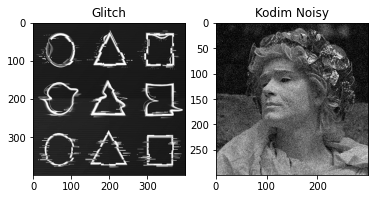

#.#.
 Kernel Size: 15, Iterações: 1


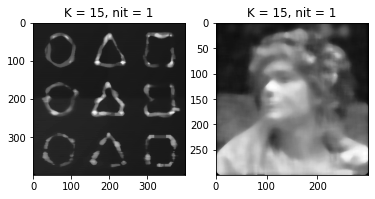

In [8]:
#Entradas do kernel e de iterações
ksize = 15 #<--
nits = 1
#Loop para A&B -> testar kernel
imgA = cv.imread("../gcPDI/imgMy/glitch.jpg",0)
imgB = cv.imread("../gcPDI/imgMy/kodimnoisy300.jpg",0)
print("Imagens de análise:")
plt.subplot(1,2,1)
plt.title("Glitch")
plt.imshow(imgA,"gray")
plt.subplot(1,2,2)
plt.title("Kodim Noisy")
plt.imshow(imgB,"gray")
plt.show()
#
imgAG = filterMApply(imgA, ksize, nits)
imgBG = filterMApply(imgB, ksize, nits)
print("\n Kernel Size: {}, Iterações: {}".format(ksize,nits))
plt.subplot(1,2,1)
plt.title("K = {}, nit = {}".format(ksize,nits))
plt.imshow(imgAG,"gray")
plt.subplot(1,2,2)
plt.title("K = {}, nit = {}".format(ksize,nits))
plt.imshow(imgBG,"gray")
plt.show()

Imagens de análise:


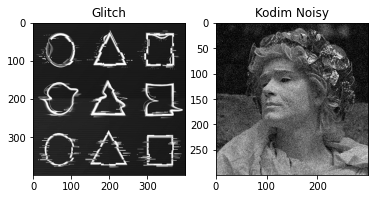

#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.
 Kernel Size: 5, Iterações: 20


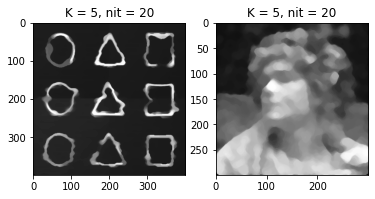

In [9]:
#Entradas do kernel e de iterações
ksize = 5
nits = 20 #<--
#Loop para A&B -> testar iteração
imgA = cv.imread("../gcPDI/imgMy/glitch.jpg",0)
imgB = cv.imread("../gcPDI/imgMy/kodimnoisy300.jpg",0)
print("Imagens de análise:")
plt.subplot(1,2,1)
plt.title("Glitch")
plt.imshow(imgA,"gray")
plt.subplot(1,2,2)
plt.title("Kodim Noisy")
plt.imshow(imgB,"gray")
plt.show()
#
imgAG = filterMApply(imgA, ksize, nits)
imgBG = filterMApply(imgB, ksize, nits)
print("\n Kernel Size: {}, Iterações: {}".format(ksize,nits))
plt.subplot(1,2,1)
plt.title("K = {}, nit = {}".format(ksize,nits))
plt.imshow(imgAG,"gray")
plt.subplot(1,2,2)
plt.title("K = {}, nit = {}".format(ksize,nits))
plt.imshow(imgBG,"gray")
plt.show()

Na figura "glitch.jpg" a aplicação do filtro foi efetiva, dado ao seu comportamento esperado, e mostrou que um número maior de iterações se torna desnecessário, pois vai consumir recursos de processamento para obter resultados que apresentam poucas diferenças entre si.

Já na figura "kodimnoisy300.jpg", ainda é perceptível ruído, apesar de que com menor intensidade. Porém, os detalhes como olhos e boca estão mais perceptíveis do que o resultado da aplicação do **Filtro Média**.

Em relação à implementação do código, mostra-se que a lógica da função precisa de ajustes, uma vez que as arestas das imagens acumulam pixels discrepantes como valor mediano. Mas cabe a avaliação se o custo operacional de aprimorar esse código vale a pena. 